In [ ]:
import numpy as np 
import pandas as pd 

file_path = "D:/Tugas kuliah/Semester 3/Kecerdasan Buatan/Project UAS Kecerdasan Buatan/Churn Bank Customers.csv"

df = pd.read_csv(file_path) #membaca file csv
df.head()                   #menampilkan 5 baris data pertama

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
import warnings
warnings.filterwarnings('ignore')   #menghilangkan pesan peringatan yang tidak relevan

In [3]:
df.shape                    #menampilkan dimensi baris dan kolom

(10000, 14)

In [4]:
df.info()                   #menampilkan informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print('df duplicated values: ',df.duplicated().sum())   #mengecek jumlah data duplikat

df duplicated values:  0


In [6]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])    #menghapus kolom yang tidak relevan untuk analisis, RowNumber: Nomor baris, CustomerId: ID pelanggan, Surname: Nama belakang.
df.head()                                                       #menampilkan 5 baris data pertama

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()                                     #mengubah data kategoris menjadi numerik
df['Geography'] = le.fit_transform(df['Geography'])     #kolom yang diubah
df['Gender'] = le.fit_transform(df['Gender'])           #kolom yang diubah

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe()           #menampilkan ringkasan statistik dataset (mean, median, std, min, dan lain-lain)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

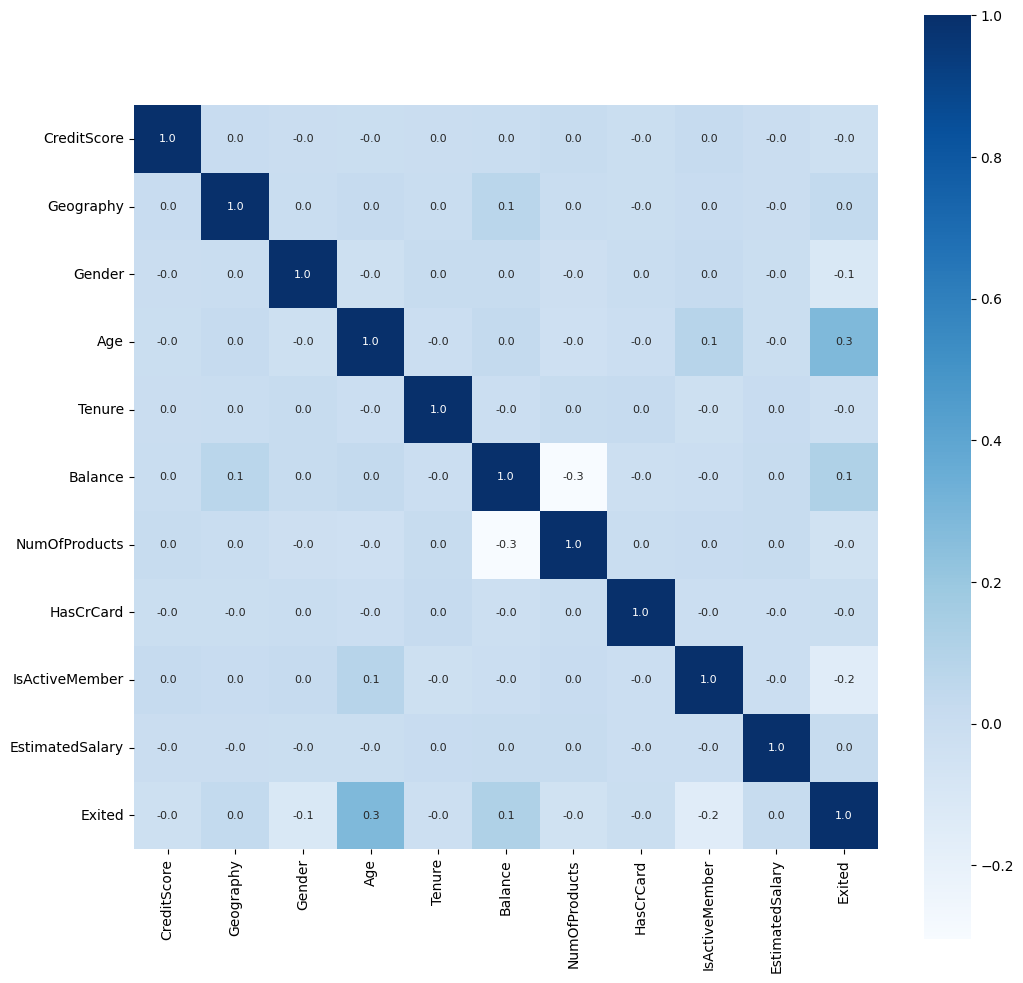

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = df.corr()         #menghitung korelasi antar variabel
plt.figure(figsize=(12,12))     
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues') #visualisasi

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                     #mengubah nilai fitur ke rentang 0–1 untuk meningkatkan performa model.

X = df.drop('Exited', axis=1).to_numpy()    #fitur (tanpa kolom target Exited).
y = df['Exited'].to_numpy()                 #target (kolom Exited).

X = scaler.fit_transform(X)

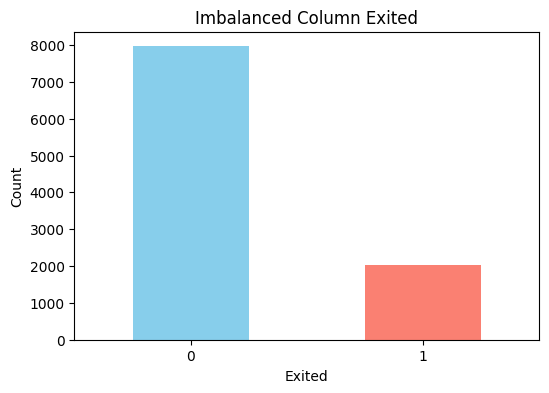

In [12]:
plt.figure(figsize=(6, 4))
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Imbalanced Column Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
from imblearn.over_sampling import SMOTE

x_res, y_res = SMOTE().fit_resample(X, y)

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [15]:
from catboost import CatBoostClassifier

model2 = CatBoostClassifier(colsample_bylevel=0.8, depth=8, learning_rate=0.2, n_estimators=200, subsample=1.0)

In [16]:
model2.fit(X_train, y_train)

0:	learn: 0.5835460	total: 141ms	remaining: 28s
1:	learn: 0.5260797	total: 156ms	remaining: 15.4s
2:	learn: 0.4835353	total: 169ms	remaining: 11.1s
3:	learn: 0.4525220	total: 182ms	remaining: 8.94s
4:	learn: 0.4345233	total: 196ms	remaining: 7.63s
5:	learn: 0.4196999	total: 208ms	remaining: 6.72s
6:	learn: 0.4083095	total: 220ms	remaining: 6.06s
7:	learn: 0.3976365	total: 232ms	remaining: 5.57s
8:	learn: 0.3897517	total: 245ms	remaining: 5.21s
9:	learn: 0.3858326	total: 255ms	remaining: 4.84s
10:	learn: 0.3802245	total: 266ms	remaining: 4.58s
11:	learn: 0.3747115	total: 279ms	remaining: 4.37s
12:	learn: 0.3638304	total: 292ms	remaining: 4.2s
13:	learn: 0.3546310	total: 305ms	remaining: 4.05s
14:	learn: 0.3454931	total: 316ms	remaining: 3.9s
15:	learn: 0.3420520	total: 329ms	remaining: 3.78s
16:	learn: 0.3380540	total: 341ms	remaining: 3.67s
17:	learn: 0.3329153	total: 353ms	remaining: 3.57s
18:	learn: 0.3271314	total: 366ms	remaining: 3.48s
19:	learn: 0.3209890	total: 378ms	remaining: 

In [17]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the best model
ypred = model2.predict(X_test)

# Evaluate model and print classification report
print("\nClassification Report:\n", classification_report(y_test, ypred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1633
           1       0.92      0.90      0.91      1553

    accuracy                           0.91      3186
   macro avg       0.92      0.91      0.91      3186
weighted avg       0.92      0.91      0.91      3186



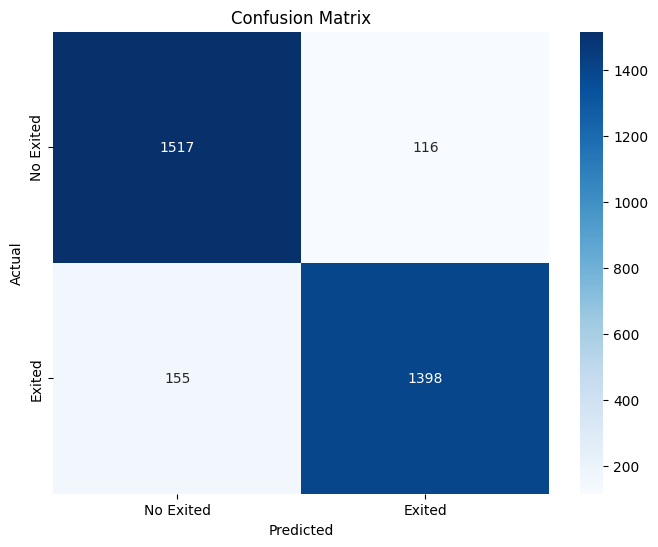

In [18]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, ypred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Exited", "Exited"], yticklabels=["No Exited", "Exited"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(df['Exited'].value_counts())

# setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_res).value_counts())

# bentuk data
print("Sebelum SMOTE:", X.shape, y.shape)
print("Setelah SMOTE:", x_res.shape, y_res.shape)


Distribusi kelas sebelum SMOTE:
Exited
0    7963
1    2037
Name: count, dtype: int64
Distribusi kelas setelah SMOTE:
1    7963
0    7963
Name: count, dtype: int64
Sebelum SMOTE: (10000, 10) (10000,)
Setelah SMOTE: (15926, 10) (15926,)


In [20]:
#menampilkan jumlah data training dan testing
print("Jumlah data training (X_train, y_train):", X_train.shape)
print("Jumlah data testing (X_test, y_test):", X_test.shape)

Jumlah data training (X_train, y_train): (12740, 10)
Jumlah data testing (X_test, y_test): (3186, 10)
